# Objetos geométricos 

**Fonte:**
Este material é uma tradução e adaptação do notebook: https://github.com/Automating-GIS-processes/2018/blob/master/source/notebooks/L1/geometric-objects.ipynb

## Visão geral sobre objetos e módulo Shapely

![Spatial data model](images/SpatialDataModel.png)
*Os objetos fundamentais que podem ser usados em python com o modulo* [Shapely](https://shapely.readthedocs.io/en/latest/project.html) 

Os objetos geométricos fundamentais para trabalhar com dados georeferenciados são `Points`, `Lines` e `Polygons`. Em python podemos usar o modulo [Shapely](https://shapely.readthedocs.io/en/latest/project.html) para trabalhar com esses `Geometric Objects`. Algumas funcionalidades possíveis com Shapely:

-  Criar uma `Line` ou `Polygon` de uma `Collection` de geometrias de `Point`
-  Calcular área, tamanho e  etc. de geometrias
-  Realizar operações geométricas como: `Union`, `Difference`, `Distance` e etc.
-  Realizar conmsultas espaciais entre geometrias como: `Intersects`, `Touches`, `Crosses`, `Within` e etc.

**Objetos geométricos consistem em tuplas de coordenadas, em que:**

-  `Point` representa um único ponto no espaço. Podendo ser bidimensional (x, y) ou tridimensional (x, y, z).
-  `LineString` representa uma sequencia de pontos para formar uma linha. Uma linha consiste de pelo menos dois pontos.
-  `Polygon` representa um polígono preenchido que consiste de uma lista de pelo menos três pontos, que formam um anel externo e possui a possibilidade de haver aberturas internas (buracos).

**Também é possível construir uma coleção de objetos geométricos, como:**

-  `MultiPoint` representa uma coleção de `Point`.
-  `MultiLineString` representa uma coleção de `LineString`.
-  `MultiPolygon` representa uma coleção de `Polygon`.

É possível instalar o módulo Shapely em nosso ambiente através do comando:
*conda install shapely*

## Point

-  Para criar um objeto `Point` é fácil, basta passar as coordenadas x e y para o objeto `Point()` (também é possível incluir a coordenada z):

In [29]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

# What is the type of the point?
point_type = type(point1)

-  Vamos verificar o tipo das variáveis:

In [5]:
print(point1)
print(point3D)
print(type(point1))

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)
<class 'shapely.geometry.point.Point'>


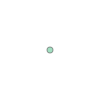

In [34]:
# Visualize the point
point1

Podemos observar que o tipo do objeto ponto é um `Point` do módulo Shapely que é especificado em um formato baseado na biblioteca [GEOS](https://trac.osgeo.org/geos) do C++, que é um biblioteca padrão de GIS. Uma das bibliotecas utilizadas para construir por exemplo o [QGIS](http://www.qgis.org/en/site/). Pontos tridimensionais podem ser reconhecidos pela letra maiúscula Z.

### Point - Atributos e funções

Os objetos `Point` possuem atributos e funções bastante úteis. Uma das funções mais úteis é a capacidade de extrair as coordenadas e a possibilidade de calcular a distância euclidiana entre dois pointos.

In [8]:
# Get the coordinates
point_coords = point1.coords

# What is the type of this?
type(point_coords)

shapely.coords.CoordinateSequence

Como pode ser observado o tipo de dado da variável `point_coords` é um Shapely CoordinateSequence.

- Vamos ver como recuperar as coordenadas deste objeto:

In [9]:
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

# Print out
print("xy variable:\n", xy, "\n")
print("x variable:\n", x, "\n")
print("y variable:\n", y)

xy variable:
 (array('d', [2.2]), array('d', [4.2])) 

x variable:
 2.2 

y variable:
 4.2


Como podemos ver acima a variável `xy` contém uma tupla em que as coordendas x e y são armazendas em um array numpy.
Usando os atributos `point1.x` e `point1.y` é possível obter as coordendas dieretamente como números decimais.

- Também é possível calcular a distância entre pontos, que é muito útil em diversas aplicações. A distância retornada é baseada na __projeção__ dos pontos (ex. graus em WGS84, metros em UTM):

In [10]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


## LineString

Criar um objeto `LineString` é relativamente similar de como o objeto `Point` foi criado. 

- Agora em vez de usar uma única tupla de coordenadas, nós podemos contruir a _linha_ usando uma lista de `Point` ou passar um vetor de tuplas:

In [11]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to use coordinate tuples having the same outcome
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# Print the results
print("line variable: \n", line, "\n")
print("line2 variable: \n", line2, "\n")
print("type of the line: \n", type(line))

line variable: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 

line2 variable: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 

type of the line: 
 <class 'shapely.geometry.linestring.LineString'>


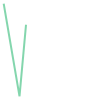

In [35]:
# Visualize the line
line

Como podemos ver acima, a variável _line_ constitue um multiplo par de coordenadas e o tipo do dado é um `LineString` do módulo shapely.

### LineString - Atributos e funções

O objeto `LineString` possui diversos atributos e funções. Com ele é possível extrair as coordenadas ou o tamanho da linha, calcular o centróide, criar pontos ao longo da linha em distâncias especificas, calcular a menor distância da linha para um ponto especifico e também simplificar a geométria. A lista completa de funcionalidades pode esta documentado em: [Shapely documentation](https://shapely.readthedocs.io/en/latest/manual.html#linestrings). Vamos utilizar algumas delas.

- Nós podemos extrair as coordenadas da `LineString` similar ao que foi feito com o `Point`


In [12]:
# Get x and y coordinates of the line
lxy = line.xy

print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


Como podemos observar, as coordenadas novamente são armazenadas em arrays numpy em que o primeiro array incluir toda as coordenadas x e o segundo todas as coordendas y.

- Podemos extrair somente as coordendas x e y das seguintes formas.

In [13]:
# Extract x coordinates
line_x = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_y = line.xy[1]

print('line_x:\n', line_x, '\n')

print('line_y:\n', line_y)

line_x:
 array('d', [2.2, 7.2, 9.26]) 

line_y:
 array('d', [4.2, -25.1, -2.456])


- É possível recuperar atributos específicos como o tamanho da linha, o centro (centróide) diretamente do objeto:

In [14]:
# Get the lenght of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid

# What type is the centroid?
centroid_type = type(l_centroid)

# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", centroid_type)

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


Estas ja são informações bastante úteis para muitas tarefas utilizando GIS, e ainda não calculamos nada ainda. Estes atributos estão embutidos em todos os objetos `LineString` que são criados.

É importante perceber que o centróide retornado é um objeto `Point`, que possui as próprias funções já mencionadas anteriormente. 

## Polygon

Para criar um objeto `Polygon` continuaremos usando a mesma lógica do `Point` e `LineString`, porém o objeto só aceita vetor ou tupla de tuplas com as coordendas.

- Para criar um polígono sao necessários pelo menos três coordendas (que basicamente formam um triângulo).

In [20]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

# Geometry type can be accessed as a String
poly_type = poly.geom_type

# Using the Python's type function gives the type in a different format
poly_type2 = type(poly)

# Let's see how our Polygon looks like
print('poly:', poly)
print('poly2:', poly2)
print("Geometry type as text:", poly_type)
print("Geometry how Python shows it:", poly_type2)

poly: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
poly2: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
Geometry type as text: Polygon
Geometry how Python shows it: <class 'shapely.geometry.polygon.Polygon'>


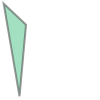

In [38]:
# Visualize the polygon
poly

Perceba que a representação do `Polygon` possui dois parentesis ao redor das coordendas (ex. `POLYGON ((<valores>))` ). Isso acontece porque o polygono pode ter aberturas (buracos) dentro dele. 

Como é mostrado na documentação do `Polygon` (utilizando a função help do python) um polígono pode ser construído usando as coordendas exteriores e coordendas interiores (opcionais), em que as coordendas interiores criam um buraco dentro do polígono. 

In [24]:
# # Help function to show the documentation of Shapely's Polygon
# help(Polygon)

```
Help on Polygon in module shapely.geometry.polygon object:
     class Polygon(shapely.geometry.base.BaseGeometry)
      |  A two-dimensional figure bounded by a linear ring
      |
      |  A polygon has a non-zero area. It may have one or more negative-space
      |  "holes" which are also bounded by linear rings. If any rings cross each
      |  other, the feature is invalid and operations on it may fail.
      |
      |  Attributes
      |  ----------
      |  exterior : LinearRing
      |      The ring which bounds the positive space of the polygon.
      |  interiors : sequence
      |      A sequence of rings which bound all existing holes.
      
```

-  Vamos ver como podemos criar um `Polygon` com um buraco interno.

In [31]:
# Let's create a bounding box of the world and make a whole in it

# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

-  Vamos ver o que temos agora:

In [32]:
print('world:', world)
print('world_has_a_hole:', world_has_a_hole)
print('type:', type(world_has_a_hole))

world: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
world_has_a_hole: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))
type: <class 'shapely.geometry.polygon.Polygon'>


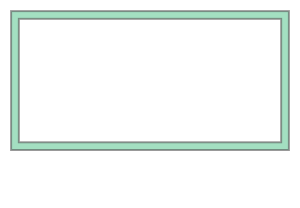

In [36]:
# Visualize the polygon with a hole
world_has_a_hole

Como podemos observar, o `Polygon` agora possui duas tuplas diferentes de coordendas. A primeira representa o **exterior** e a segunda representa o **buraco** presente no interior do polígono.

### Polygon - Atributos e funções

Podemos novamente acessar diferentes atributos diretamente do objeto `Polygon`, que podem ser bastante úteis para muitas análises, como: obter área, centróide, bounding box, o exterior e o perímetro (tamanho exterior).

- Aqui, podemos ver algunas atributos disponíveis e como acessá-los:

In [39]:
# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

# Print the outputs
print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Exterior: ", world_ext)
print("Poly Exterior Length: ", world_ext_length)

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


Como podemos ver acima, de maneira direta podemos acessar diferentes atributos do objeto `Polygon`. Porém perceba  que o tamanho do perímetro exterior foi obtido em graus decimais, porque estamos utilizando coordendas de latitude e longitude na entrada do nosso polígono. Posteriormente vamos aprender a mudar a projeção desses dados e ser capaz de obter as mesmas informações em metro.

## Coleção de geometrias (opcional)

Em algumas ocasiões é útil armazenar multiplas linhas ou polígonos em uma única feature (ex: uma única geometria representam varios polígonos). Estas coleções são implementadas através dos objetos:

-  `MultiPoint` representa uma coleção de `Point`.
-  `MultiLineString` representa uma coleção de `LineString`.
-  `MultiPolygon` representa uma coleção de `Polygon`.

Estas coleções não são computacionalmente significantes, mas são úteis para modelar certos tipos de features. Por exemplo, uma rua em formato de Y utilizando `MultiLineString`, um conjunto de ilhas em um arquipélago com  `MultiPolygon`.

Criar e visualizar um [bounding box](https://en.wikipedia.org/wiki/Minimum_bounding_box) minímo ao redor dos seus dados de pontos é uma função bastante útil para muitos propósitos (ex: tentar entender a extensão dos seus dados), em seguida veremos como é possível realizar esta operação.

In [41]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# --------------------------------------------------------------------------------------------------

# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s). 
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

# Print outputs
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)


MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


Podemos observar que as saídas são similares as geometrias básicas que foram criadas anteriormente, más agora esses objetos são extensíveis para multiplos pontos, linhas e polígonos.

### Geometry collection -  Atributos e funções

- Podemos também utilizar muitas funções internas especificas destas coleções, como o `Convex Hull`:

In [42]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
convex = multi_point.convex_hull

# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)

# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area

# We can also access different items inside our geometry collections. We can e.g. access a single polygon from
# our MultiPolygon -object by referring to the index

# Let's calculate the area of our Western hemisphere (with a hole) which is at index 0
west_area = multi_poly[0].area

# We can check if we have a "valid" MultiPolygon. MultiPolygon is thought as valid if the individual polygons 
# does notintersect with each other. Here, because the polygons have a common 0-meridian, we should NOT have 
# a valid polygon. This can be really useful information when trying to find topological errors from your data
valid = multi_poly.is_valid

# Print outputs
print("Convex hull of the points: ", convex)
print("Number of lines in MultiLineString:", lines_count)
print("Area of our MultiPolygon:", multi_poly_area)
print("Area of our Western Hemisphere polygon:", west_area)
print("Is polygon valid?: ", valid)

Convex hull of the points:  POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))
Number of lines in MultiLineString: 2
Area of our MultiPolygon: 39200.0
Area of our Western Hemisphere polygon: 6800.0
Is polygon valid?:  False


Como mostrado acima podemos ver que o objeto `MultiPolygon` possui os mesmos atributos que o objeto `Polygon`, mas agora métodos como cálculo da área retorna a soma das áreas de **todos** os polígonos presentes no objeto.

Também existem algumas funções extras disponíveis apenas para estas coleções, como **is_valid** que retorna se o polígono ou linhas possuem interseção um com o outro.